In [59]:
import pickle
import numpy as np
import os
from scipy.stats import norm
import matplotlib.pyplot as plt

In [60]:
means = []
gts = []
stds = []
vars = []
fs = os.listdir('data')
for f in fs:
    if "new" not in f:
        continue
    with (open(f"data/{f}", "rb")) as openfile:
        measurements = pickle.load(openfile)
        measurements = np.array(measurements,dtype=np.float64)
        means.append(measurements.mean())
        stds.append(measurements.std())
        vars.append(measurements.var())
        gts.append(float(f.split('_')[2]))
biases = [abs(g-m) for (g,m) in zip(gts,means)]

In [67]:
measurements.mean(), measurements.var(), measurements.std(), measurements

(9.6595,
 0.0002387499999999958,
 0.015451537140362308,
 array([9.67, 9.67, 9.67, 9.67, 9.63, 9.66, 9.65, 9.67, 9.67, 9.68, 9.65,
        9.64, 9.67, 9.67, 9.65, 9.66, 9.66, 9.64, 9.65, 9.64, 9.67, 9.68,
        9.66, 9.67, 9.68, 9.69, 9.66, 9.68, 9.61, 9.65, 9.65, 9.64, 9.63,
        9.67, 9.64, 9.67, 9.66, 9.66, 9.67, 9.67, 9.67, 9.67, 9.66, 9.62,
        9.65, 9.67, 9.67, 9.66, 9.66, 9.66, 9.66, 9.66, 9.67, 9.68, 9.67,
        9.62, 9.64, 9.67, 9.66, 9.68, 9.66, 9.66, 9.67, 9.68, 9.64, 9.66,
        9.66, 9.64, 9.67, 9.66, 9.67, 9.65, 9.66, 9.65, 9.69, 9.65, 9.66,
        9.65, 9.62, 9.66, 9.65, 9.67, 9.67, 9.68, 9.67, 9.64, 9.65, 9.67,
        9.67, 9.67, 9.67, 9.64, 9.63, 9.66, 9.67, 9.65, 9.65, 9.67, 9.66,
        9.67]))

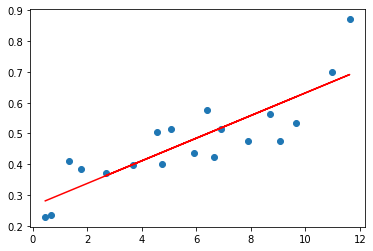

In [62]:
plt.scatter(means,biases)
coef = np.polyfit(means,biases,1)
poly1d_fn = np.poly1d(coef)
plt.plot(means,poly1d_fn(means),'r')

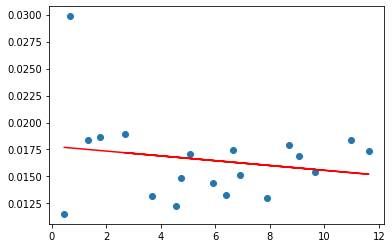

In [63]:
plt.scatter(means,stds)
coef = np.polyfit(means,stds,1)
poly1d_fn = np.poly1d(coef)
plt.plot(means,poly1d_fn(means),'r')

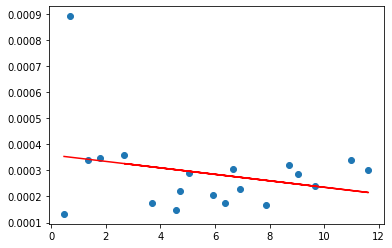

In [64]:
plt.scatter(means,vars)
coef = np.polyfit(means,vars,1)
poly1d_fn = np.poly1d(coef)
plt.plot(means,poly1d_fn(means),'r')

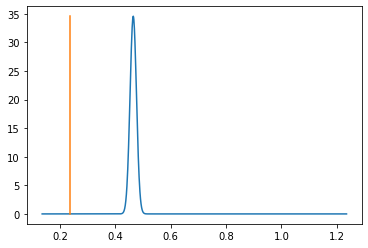

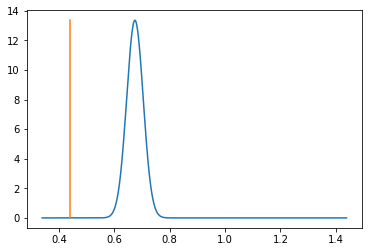

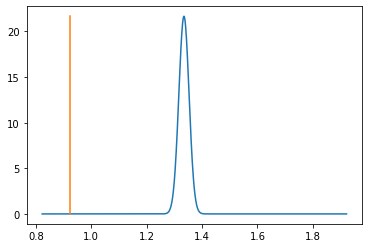

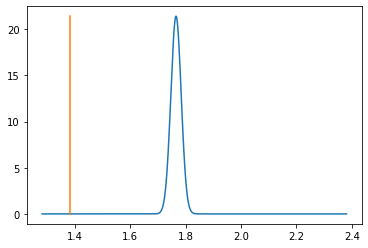

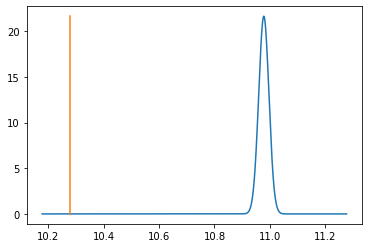

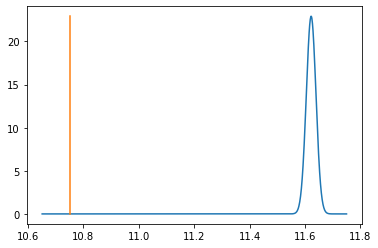

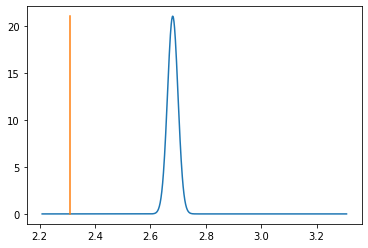

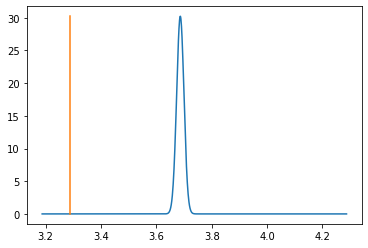

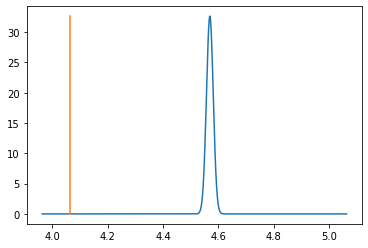

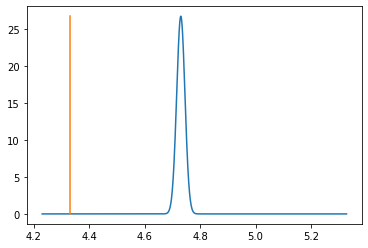

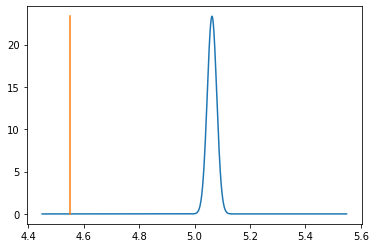

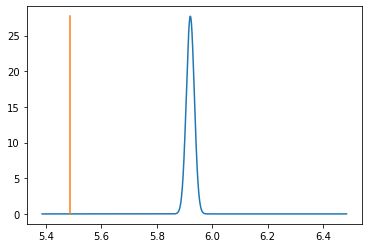

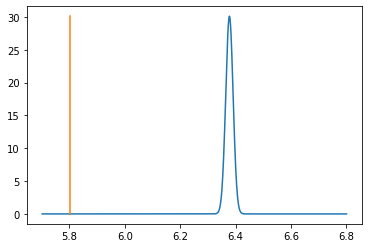

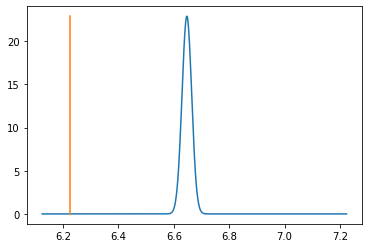

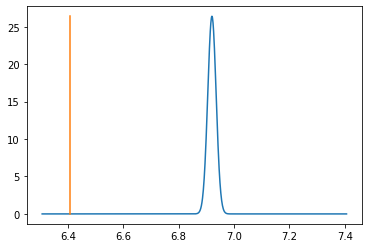

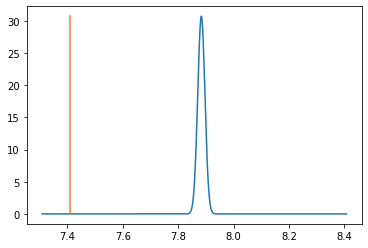

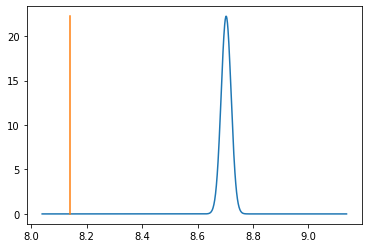

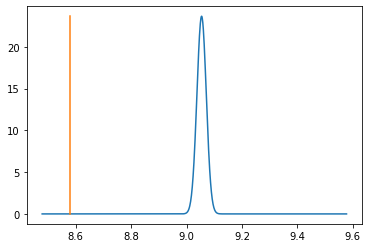

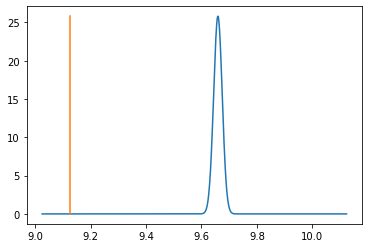

In [65]:
for i,(m,g,s) in enumerate(zip(means,gts,stds)):
    # Plot between around ground truth
    x_axis = np.arange(g-.1, g+1, 0.001)
    plt.figure(i)
    # Mean = 0, SD = 2.
    ys = norm.pdf(x_axis,m,s)
    plt.plot(x_axis, ys)
    plt.plot([g,g],[0,ys.max()])
    # print(f"bias: {abs(g-m)}; mean: {m};")
plt.show()